In [3]:
import numpy as np
import spacecharger as sc
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import RegularGridInterpolator

In [4]:
E_sc, B_sc, xx, yy, zz = sc.routine("input_file.py")

2
ER_values shape: (23, 1)
EZ_values shape: (23, 1)


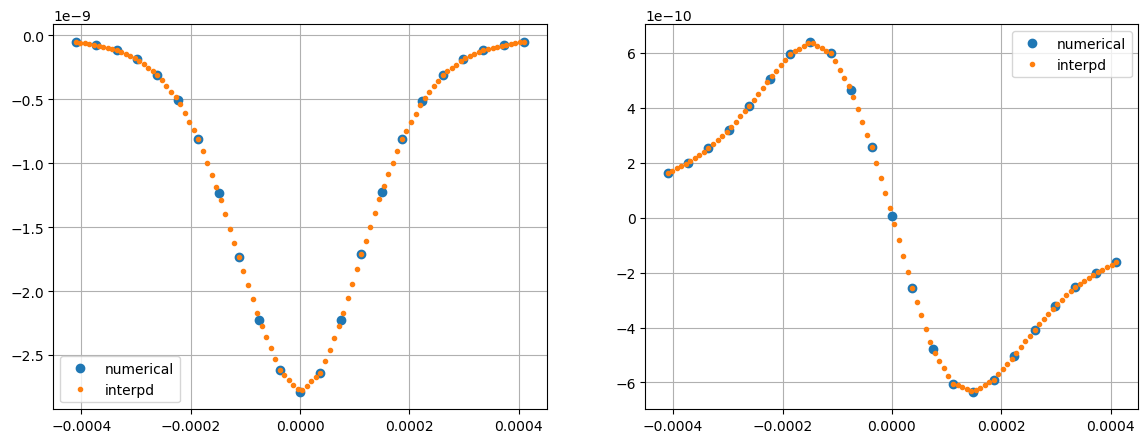

In [5]:
brad = 1E-4

# get actual value of E_sc at that mesh point?
shared_id = sc.closestVal(0, yy)
print(shared_id)

ER_sc_int = RegularGridInterpolator((xx, zz), E_sc[:, shared_id, :, 0])
EZ_sc_int = RegularGridInterpolator((xx, zz), E_sc[:, shared_id, :, 2])

# set 1e-4 to the bunch rad


# this is getting the radial and transverse fields at the bunch's radius
# sweeping across Z
ER_values = np.array([ER_sc_int([brad, z]) for z in zz])
EZ_values = np.array([EZ_sc_int([brad, z]) for z in zz])

print("ER_values shape:", ER_values.shape)
print("EZ_values shape:", EZ_values.shape)

z_superdense = np.linspace(zz[0], zz[-1], num=100)
erw = [ER_sc_int([brad, z]) for z in z_superdense]
wre = [EZ_sc_int([brad, z]) for z in z_superdense]

# now i have the radial and electric fields for any z and r
fig, axs = plt.subplots(1,2, figsize=(14, 5))

axs[0].grid()
# now i have to plot the E_r values at the bunch radius
# because that wouldn't match up with what i did before
axs[0].plot(zz, E_sc[sc.closestVal(brad, xx), shared_id, :][:,0], 'o', label="numerical")
axs[0].plot(z_superdense, erw, '.',label="interpd")
axs[0].legend()

axs[1].grid()
axs[1].plot(zz, E_sc[sc.closestVal(brad, xx), shared_id, :][:,2], 'o', label="numerical")
axs[1].plot(z_superdense, wre, '.', label="interpd")
axs[1].legend()

## these should match perfectly :)

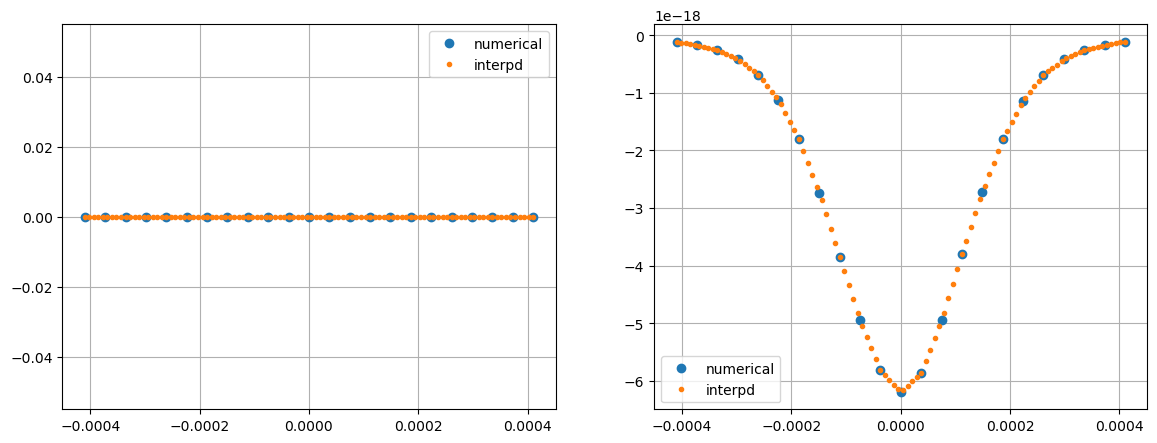

In [6]:
BX_values = B_sc[:, shared_id, :, 0]  # shape (5,33)
BY_values = B_sc[:, shared_id, :, 1]  # shape (5,33)
BXint = RegularGridInterpolator((xx, zz), BX_values)
BYint = RegularGridInterpolator((yy, zz), BY_values)

z_superdense = np.linspace(zz[0], zz[-1], num=100)
erw = [BXint([1e-4, z]) for z in z_superdense]
wre = [BYint([1e-4, z]) for z in z_superdense]

# now i have the radial and electric fields for any z and r
fig, axs = plt.subplots(1,2, figsize=(14, 5))

axs[0].grid()
axs[0].plot(zz, B_sc[sc.closestVal(brad, xx), shared_id, :][:,0], 'o', label="numerical")
axs[0].plot(z_superdense, erw, '.',label="interpd")
axs[0].legend()

axs[1].grid()
axs[1].plot(zz, B_sc[sc.closestVal(brad, xx), shared_id, :][:,1], 'o', label="numerical")
axs[1].plot(z_superdense, wre, '.', label="interpd")
axs[1].legend()

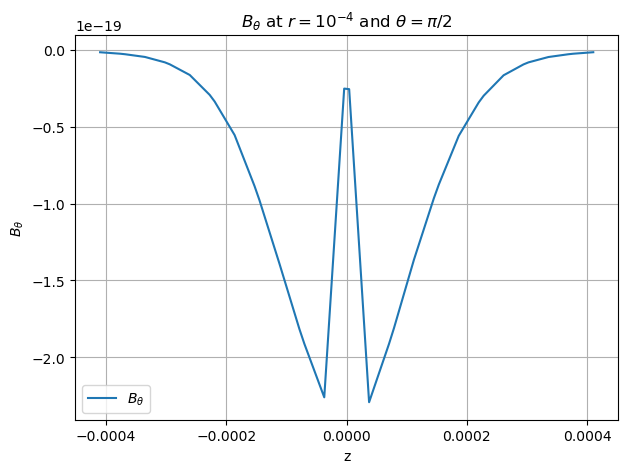

In [7]:
theta = 0

BX_along_z = np.array([BXint([0, z]) for z in z_superdense])
BY_along_z = np.array([BYint([0, z]) for z in z_superdense])

# Compute B_theta
B_theta_along_z = -BX_along_z * np.sin(theta) + BY_along_z * np.cos(theta)

# Plot B_theta
plt.figure(figsize=(7,5))
plt.grid()
plt.plot(z_superdense, B_theta_along_z, label=r"$B_\theta$")
plt.xlabel("z")
plt.ylabel(r"$B_\theta$")
plt.legend()
plt.title(r"$B_\theta$ at $r=10^{-4}$ and $\theta=\pi/2$")
plt.show()

## Something Stupid
Should I interpolate in 3D?

#